<a href="https://colab.research.google.com/github/hindia-vic/deep_learning/blob/main/data_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd
 import cv2
 import os
 import PIL
 from matplotlib import pyplot as plt
 import numpy as np
 from tensorflow import keras
 import tensorflow as tf
 from tensorflow.keras import models,layers

In [2]:
#downloading google flower dataset
data_url='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'
data_dir=tf.keras.utils.get_file('flower_photos',origin=data_url,untar=True)

In [3]:
data_dir

'/root/.keras/datasets/flower_photos'

In [4]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [5]:
image_count=len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


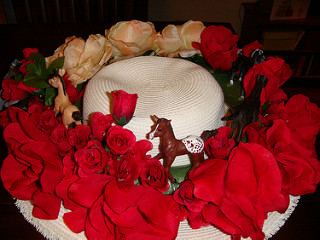

In [6]:
roses=list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

In [7]:
flower_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
    }

In [8]:
flower_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4
    }

In [9]:
img=cv2.imread(str(flower_images_dict['roses'][0]))
img.shape

(240, 320, 3)

In [10]:
x,y=[],[]
for flower_name,images in flower_images_dict.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flower_labels_dict[flower_name])

In [11]:
X=np.array(x)
Y=np.array(y)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0)


In [13]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255

In [15]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(180,180,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(5,activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(x_train_scaled,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.3824 - loss: 1.9453
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.5874 - loss: 0.9965
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.7587 - loss: 0.6684
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8936 - loss: 0.3469
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 149s 2s/step - accuracy: 0.9603 - loss: 0.1554


In [17]:
cnn.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 505ms/step - accuracy: 0.6207 - loss: 1.2796


In [32]:
data_augmentation=keras.Sequential([
     layers.RandomZoom(height_factor=(0.1, 0.3), width_factor=(0.1, 0.3)),
     layers.RandomRotation(0.1),
     layers.RandomFlip()
])

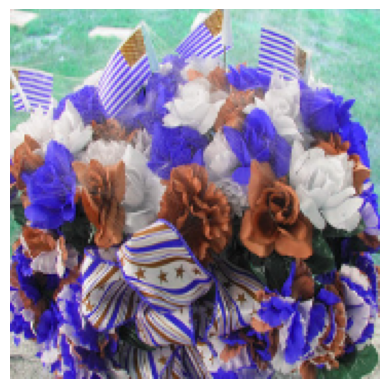

In [33]:
plt.axis('off')
plt.imshow(x[0])

In [30]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[165.72572 , 207.18695 , 217.09691 ],
        [141.13745 , 194.22131 , 192.4868  ],
        [142.68001 , 197.08916 , 184.00343 ],
        ...,
        [136.80014 , 201.94568 , 174.69612 ],
        [151.1579  , 204.19156 , 189.79378 ],
        [154.17545 , 201.8127  , 195.1213  ]],

       [[173.45279 , 217.23749 , 213.52264 ],
        [143.74799 , 206.6546  , 184.35489 ],
        [143.45671 , 203.8519  , 177.63751 ],
        ...,
        [119.341034, 192.78175 , 164.67528 ],
        [130.69267 , 187.73602 , 173.77582 ],
        [131.26274 , 186.51202 , 172.81699 ]],

       [[178.10173 , 220.93958 , 219.42117 ],
        [152.54114 , 214.7178  , 199.8836  ],
        [157.98146 , 214.43573 , 201.11404 ],
        ...,
        [115.70357 , 201.02484 , 164.26883 ],
        [126.74931 , 201.01674 , 172.57729 ],
        [119.748886, 199.20863 , 166.48724 ]],

       ...,

       [[162.51428 , 154.69823 , 167.21643 ],
        [178.

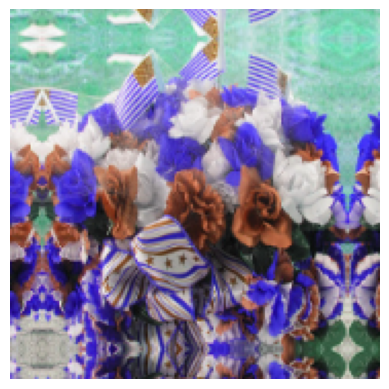

In [31]:
plt.axis('off')
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))
#

In [34]:
cnn_aug=models.Sequential([
    data_augmentation,
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(180,180,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(5,activation='softmax')
])
cnn_aug.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn_aug.fit(x_train_scaled,y_train,epochs=5)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 167s 2s/step - accuracy: 0.3265 - loss: 2.1704
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.5269 - loss: 1.1367
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.6098 - loss: 0.9985
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.6271 - loss: 0.9342
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.6435 - loss: 0.9179


In [36]:
cnn_aug.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 14s 481ms/step - accuracy: 0.6452 - loss: 0.9429


[0.9555856585502625, 0.6427015066146851]